## Data quality

In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
log= pd.read_csv('https://raw.githubusercontent.com/gianscuri/Twitch_Community_Graph/main/DataCollection/Twitch_stream_spect/Twitch_stream_collection.log', 
               names=['Time', 'num', 'Type', 'Cod', 'Message'], header=None)

In [3]:
log.head()

,Time,num,Type,Cod,Message
0,2022-05-05 15:09:10,508,INFO,1,Caricamento chiavi di accesso
1,2022-05-05 15:09:18,133,INFO,2,Numero di stream online: 1597
2,2022-05-05 15:09:25,487,INFO,3,Numero di spettatori online: 44353
3,2022-05-05 15:09:25,568,INFO,4,file 2022-05-05_15-09 salvato
4,2022-05-05 15:14:10,398,INFO,1,Caricamento chiavi di accesso


In [4]:
df_noERR= pd.read_csv('log_noERR')# file ripulito dagli errori

In [5]:
df_noERR.head()

,Unnamed: 0,Time,num,Type,Cod,Message
0,0,2022-05-05 15:09:10,508,INFO,1,Caricamento chiavi di accesso
1,1,2022-05-05 15:09:18,133,INFO,2,Numero di stream online: 1597
2,2,2022-05-05 15:09:25,487,INFO,3,Numero di spettatori online: 44353
3,3,2022-05-05 15:09:25,568,INFO,4,file 2022-05-05_15-09 salvato
4,4,2022-05-05 15:14:10,398,INFO,1,Caricamento chiavi di accesso


### Currency

In [6]:
df=df_noERR[(df_noERR['Cod']== 1) |(df_noERR['Cod']== 4)]
df.head()

,Unnamed: 0,Time,num,Type,Cod,Message
0,0,2022-05-05 15:09:10,508,INFO,1,Caricamento chiavi di accesso
3,3,2022-05-05 15:09:25,568,INFO,4,file 2022-05-05_15-09 salvato
4,4,2022-05-05 15:14:10,398,INFO,1,Caricamento chiavi di accesso
7,7,2022-05-05 15:14:26,965,INFO,4,file 2022-05-05_15-14 salvato
8,8,2022-05-05 15:19:30,551,INFO,1,Caricamento chiavi di accesso


In [7]:
times=[]
for time in  df['Time']:
    times.append(datetime.strptime(time, '%Y-%m-%d %H:%M:%S'))

In [8]:
df['datetime']= times

C:\Users\paola\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
curr = np.diff(times)[::2]

In [10]:
curr

array([datetime.timedelta(seconds=15), datetime.timedelta(seconds=16),
       datetime.timedelta(seconds=31), ...,
       datetime.timedelta(seconds=12), datetime.timedelta(seconds=12),
       datetime.timedelta(seconds=13)], dtype=object)

In [11]:
sec=[]
for i in range(len(curr)):
    sec.append(curr[i].seconds)

In [12]:
f= df[df['Cod']==4]
f.shape

(3823, 7)

In [13]:
f['delta']= sec

C:\Users\paola\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
f.head()

,Unnamed: 0,Time,num,Type,Cod,Message,datetime,delta
3,3,2022-05-05 15:09:25,568,INFO,4,file 2022-05-05_15-09 salvato,2022-05-05 15:09:25,15
7,7,2022-05-05 15:14:26,965,INFO,4,file 2022-05-05_15-14 salvato,2022-05-05 15:14:26,16
11,11,2022-05-05 15:20:01,914,INFO,4,file 2022-05-05_15-20 salvato,2022-05-05 15:20:01,31
15,15,2022-05-05 15:24:25,214,INFO,4,file 2022-05-05_15-24 salvato,2022-05-05 15:24:25,16
19,19,2022-05-05 15:29:25,469,INFO,4,file 2022-05-05_15-29 salvato,2022-05-05 15:29:25,16


In [15]:
f.dtypes

Unnamed: 0             int64
Time                  object
num                    int64
Type                  object
Cod                    int64
Message               object
datetime      datetime64[ns]
delta                  int64
dtype: object

In [16]:
f['hour']= f['datetime'].dt.hour

C:\Users\paola\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
f.head()

,Unnamed: 0,Time,num,Type,Cod,Message,datetime,delta,hour
3,3,2022-05-05 15:09:25,568,INFO,4,file 2022-05-05_15-09 salvato,2022-05-05 15:09:25,15,15
7,7,2022-05-05 15:14:26,965,INFO,4,file 2022-05-05_15-14 salvato,2022-05-05 15:14:26,16,15
11,11,2022-05-05 15:20:01,914,INFO,4,file 2022-05-05_15-20 salvato,2022-05-05 15:20:01,31,15
15,15,2022-05-05 15:24:25,214,INFO,4,file 2022-05-05_15-24 salvato,2022-05-05 15:24:25,16,15
19,19,2022-05-05 15:29:25,469,INFO,4,file 2022-05-05_15-29 salvato,2022-05-05 15:29:25,16,15


In [18]:
np.mean(sec)

14.35207951870259

In [19]:
above= f[f['delta']>14]
above

,Unnamed: 0,Time,num,Type,Cod,Message,datetime,delta,hour
3,3,2022-05-05 15:09:25,568,INFO,4,file 2022-05-05_15-09 salvato,2022-05-05 15:09:25,15,15
7,7,2022-05-05 15:14:26,965,INFO,4,file 2022-05-05_15-14 salvato,2022-05-05 15:14:26,16,15
11,11,2022-05-05 15:20:01,914,INFO,4,file 2022-05-05_15-20 salvato,2022-05-05 15:20:01,31,15
15,15,2022-05-05 15:24:25,214,INFO,4,file 2022-05-05_15-24 salvato,2022-05-05 15:24:25,16,15
19,19,2022-05-05 15:29:25,469,INFO,4,file 2022-05-05_15-29 salvato,2022-05-05 15:29:25,16,15
...,...,...,...,...,...,...,...,...,...
14607,17038,2022-05-19 00:44:25,326,INFO,4,file 2022-05-19_00-44 salvato,2022-05-19 00:44:25,17,0
14611,17042,2022-05-19 00:49:24,552,INFO,4,file 2022-05-19_00-49 salvato,2022-05-19 00:49:24,16,0
14615,17046,2022-05-19 00:54:24,377,INFO,4,file 2022-05-19_00-54 salvato,2022-05-19 00:54:24,16,0
14619,17050,2022-05-19 00:59:23,326,INFO,4,file 2022-05-19_00-59 salvato,2022-05-19 00:59:23,15,0


In [20]:
above['hour'].value_counts()

16    167
18    163
17    159
23    154
15    152
19    152
0     151
21    145
22    145
20    144
1      42
14     37
9      13
5       5
2       5
6       4
12      3
13      3
3       2
4       2
10      1
11      1
Name: hour, dtype: int64

In [21]:
above['delta'].mean()

21.884848484848487

In [22]:
under= f[f['delta']<14]
under

,Unnamed: 0,Time,num,Type,Cod,Message,datetime,delta,hour
487,496,2022-05-06 01:29:21,879,INFO,4,file 2022-05-06_01-29 salvato,2022-05-06 01:29:21,13,1
491,500,2022-05-06 01:34:21,666,INFO,4,file 2022-05-06_01-34 salvato,2022-05-06 01:34:21,13,1
507,516,2022-05-06 01:54:20,973,INFO,4,file 2022-05-06_01-54 salvato,2022-05-06 01:54:20,12,1
511,520,2022-05-06 01:59:21,640,INFO,4,file 2022-05-06_01-59 salvato,2022-05-06 01:59:21,13,1
523,532,2022-05-06 02:14:21,229,INFO,4,file 2022-05-06_02-14 salvato,2022-05-06 02:14:21,13,2
...,...,...,...,...,...,...,...,...,...
15275,17706,2022-05-19 14:39:20,377,INFO,4,file 2022-05-19_14-39 salvato,2022-05-19 14:39:20,12,14
15279,17710,2022-05-19 14:44:20,935,INFO,4,file 2022-05-19_14-44 salvato,2022-05-19 14:44:20,12,14
15283,17714,2022-05-19 14:49:20,883,INFO,4,file 2022-05-19_14-49 salvato,2022-05-19 14:49:20,12,14
15287,17718,2022-05-19 14:54:20,981,INFO,4,file 2022-05-19_14-54 salvato,2022-05-19 14:54:20,12,14


In [23]:
under['hour'].value_counts()

10    166
11    165
12    165
3     162
13    160
9     156
7     155
8     155
4     153
5     151
6     150
2     147
14    106
1      72
20      6
15      2
Name: hour, dtype: int64

C:\Users\paola\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\paola\Anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:>

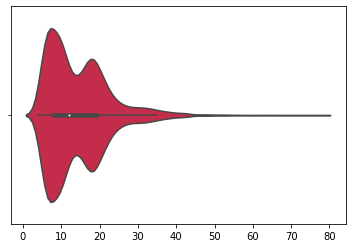

In [24]:
sns.violinplot(sec, orient= "v", color= 'crimson')

### Completeness

In [25]:
idealtot= 4032 # in 2 settimane

In [26]:
effective= log[log['Cod'] == '4']['Cod'].count()

In [27]:
effective

3823

In [28]:
errors = log[log['Type'] == 'ERROR']

In [29]:
errors.head()

,Time,num,Type,Cod,Message
270,2022-05-05 20:48:37,561,ERROR,Esecuzione terminata per Timeout,NaN
361,2022-05-05 22:43:37,446,ERROR,Esecuzione terminata per Timeout,NaN
364,2022-05-05 22:48:37,456,ERROR,Esecuzione terminata per Timeout,NaN
1346,2022-05-06 19:28:37,561,ERROR,Esecuzione terminata per Timeout,NaN
1349,2022-05-06 19:33:37,538,ERROR,Esecuzione terminata per Timeout,NaN


In [30]:
errors.shape

(229, 5)

In [31]:
failed_timeout= errors[errors['Cod']== 'Esecuzione terminata per Timeout']
failed_timeout.shape

(115, 5)

In [32]:
timeout= 115

In [33]:
other= errors[errors['Cod']!= 'Esecuzione terminata per Timeout']
other

,Time,num,Type,Cod,Message
7218,2022-05-11 23:24:58,295,ERROR,Error in user_login: Attempt to decode JSON wi...,NaN
13655,2022-05-17 20:59:28,243,ERROR,Error in user_login: Attempt to decode JSON wi...,NaN
13656,2022-05-17 20:59:28,244,ERROR,Error in user_login: Attempt to decode JSON wi...,NaN
13687,2022-05-17 21:39:38,388,ERROR,Error in user_login: Attempt to decode JSON wi...,NaN
13688,2022-05-17 21:39:38,391,ERROR,Error in user_login: Attempt to decode JSON wi...,NaN
...,...,...,...,...,...
16635,2022-05-18 16:24:26,501,ERROR,Error in user_login: Attempt to decode JSON wi...,NaN
16636,2022-05-18 16:24:26,501,ERROR,Error in user_login: Attempt to decode JSON wi...,NaN
16637,2022-05-18 16:24:26,502,ERROR,Error in user_login: Attempt to decode JSON wi...,NaN
16638,2022-05-18 16:24:26,502,ERROR,Error in user_login: Attempt to decode JSON wi...,NaN


In [34]:
runtime= 94

Text(0, 0.5, 'Num. files')

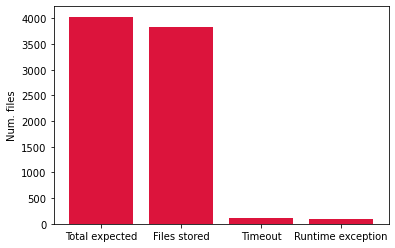

In [35]:

vals=[idealtot,effective,timeout,runtime]
inds=range(len(vals))
labels=["Total expected","Files stored","Timeout","Runtime exception"]

fig,ax = plt.subplots()
rects = ax.bar(inds, vals, color='crimson')
ax.set_xticks([ind for ind in inds])
ax.set_xticklabels(labels)
ax.set_ylabel('Num. files')

In [36]:
t= pd.date_range('2022-05-05 15:00:00', '2022-05-19 15:00:00')

In [37]:
social= pd.read_csv('https://raw.githubusercontent.com/gianscuri/Twitch_Community_Graph/main/DataCollection/Twitch_social_link/social_link.csv')

In [38]:
social.head()

,streamer,social_list
0,LyonWGFLive,['https://www.youtube.com/user/WhenGamersFail'...
1,Tumblurr,[]
2,ChristianVieriOfficial,"['https://www.instagram.com/christianvieri/', ..."
3,GrenBaud,"['https://www.tiktok.com/@grenbaud', 'https://..."
4,ZanoXVII,"['https://www.instagram.com/zanoxvii/', 'https..."


In [39]:
social.shape

(2945, 2)

In [40]:
social[social['social_list']== '[]'].shape[0] #nessun link (degli streamer di cui si è fatto scraping)

360

In [41]:
streamer_dataset = pd.read_csv('https://raw.githubusercontent.com/gianscuri/Twitch_Community_Graph/main/DataProcessing/Streamer_dataset.csv')

In [42]:
streamer_dataset.head()

,idStreamer,streamer,minutesLive,viewerMean,viewerPeak,spectMean,spectTot,socialLinks
0,0,LyonWGFLive,1155,14011,19727,9337,58801,https://www.youtube.com/user/WhenGamersFail; h...
1,1,Tumblurr,2925,13683,32436,10655,148019,NaN
2,2,ChristianVieriOfficial,570,11014,24931,7056,64614,https://www.instagram.com/christianvieri/; htt...
3,3,GrenBaud,1005,10285,30017,7600,78521,https://www.tiktok.com/@grenbaud; https://www....
4,4,ZanoXVII,3480,7681,13973,5699,157718,https://www.instagram.com/zanoxvii/; https://w...


In [43]:
streamer_dataset.shape

(2977, 8)

In [44]:
streamer_dataset.isnull().sum()

idStreamer       0
streamer         0
minutesLive      0
viewerMean       0
viewerPeak       0
spectMean        0
spectTot         0
socialLinks    392
dtype: int64

In [47]:
games_match= pd.read_csv('https://raw.githubusercontent.com/gianscuri/Twitch_Community_Graph/main/DataProcessing/temp.csv')

In [48]:
games_match.head()

,idGame,gameName,steamName,developer,publisher,releaseDate,categories
0,0,Monster Hunter Generations Ultimate,NaN,NaN,NaN,NaN,NaN
1,1,Alice: Madness Returns,Alice: Madness Returns,Spicy Horse Games,Electronic Arts,2011-06-17,"['3D Platformer', 'Action-Adventure', 'Hack an..."
2,2,Hold Fast,NaN,NaN,NaN,NaN,NaN
3,3,Pokémon Trading Card Game Online,NaN,NaN,NaN,NaN,NaN
4,4,Witch It,Witch It,Barrel Roll Games,Daedalic Entertainment,2020-10-22,"['Multiplayer', 'Funny', 'Casual', 'Action', '..."


In [49]:
games_match.isnull().sum()

idGame           0
gameName         0
steamName      665
developer      666
publisher      910
releaseDate    733
categories     667
dtype: int64

In [ ]:
games_match.shape[0]

In [50]:
print(f"% di missing in idgame {0/games_match.shape[0]*100}")
print(f"% di missing in gameName {0/games_match.shape[0]*100}")
print(f"% di missing in steamName {665/games_match.shape[0]*100}")
print(f"% di missing in developer {666/games_match.shape[0]*100}")
print(f"% di missing in publisher {910/games_match.shape[0]*100}")
print(f"% di missing in releaseDate {733/games_match.shape[0]*100}")
print(f"% di missing in categories {667/games_match.shape[0]*100}")

% di missing in idgame 0.0
% di missing in gameName 0.0
% di missing in steamName 58.12937062937063
% di missing in developer 58.21678321678322
% di missing in publisher 79.54545454545455
% di missing in releaseDate 64.07342657342657
% di missing in categories 58.3041958041958


In [52]:
print(f"% di completeness in idgame {(1-0/games_match.shape[0])*100}")
print(f"% di completeness in gameName {(1-0/games_match.shape[0])*100}")
print(f"% di completeness in steamName {(1-665/games_match.shape[0])*100}")
print(f"% di completeness in developer {(1-666/games_match.shape[0])*100}")
print(f"% di completeness in publisher {(1-910/games_match.shape[0])*100}")
print(f"% di completeness in releaseDate {(1-733/games_match.shape[0])*100}")
print(f"% di completeness in categories {(1-667/games_match.shape[0])*100}")

% di completeness in idgame 100.0
% di completeness in gameName 100.0
% di completeness in steamName 41.87062937062937
% di completeness in developer 41.78321678321678
% di completeness in publisher 20.45454545454546
% di completeness in releaseDate 35.92657342657343
% di completeness in categories 41.6958041958042
